In [232]:
# importamos todas las librerias necesarias
import torch
import torch.nn as nn # para redes neuronales
import torch.optim as optim # optimizaciones

import torchvision
from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms
from torch.utils import data

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt
import numpy as np
import cv2
from torchvision.datasets import STL10

import PIL.ImageOps


# STL10

---

---





In [115]:
data_path = 'data/'
full_data_set = datasets.STL10(data_path,  split='train',
                target_transform=None, download=True , transform= transforms.Compose(
                                                                                       [transforms.ToTensor(),
                                                                                       transforms.Normalize((0.4914, 0.4822, 0.4465),(0.4914, 0.4822, 0.4465))
                                                                                        ]))
full_validation_set  = datasets.STL10(data_path,  split='train',
                target_transform=None, download=True, transform=transforms.Compose(
                                                                                                   [transforms.ToTensor(),
                                                                                                   transforms.Normalize((0.4914, 0.4822, 0.4465),(0.4914, 0.4822, 0.4465))
                                                                                                   ]))

Files already downloaded and verified
Files already downloaded and verified


In [116]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle= True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


deer
dog
deer
dog


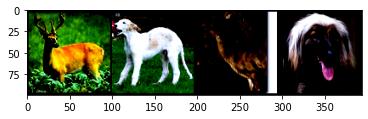

In [117]:
data_iterator = iter(dataloader)
imgs, labels= data_iterator.next()


classes = ['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']

plt.imshow(utils.make_grid(imgs).permute(1,2,0))

for i in range(size):
  print(classes[labels[i]])

In [132]:
class_names= ['dog', 'airplane']
label_map={5:0, 0:1}
data_set= [(img, label_map[label]) for img, label in full_data_set if label in [5,0]]
validation_set= [(img, label_map[label]) for img, label in full_validation_set if label in [5,0]]

print(len(data_set))
len(validation_set)

1000


1000

In [133]:
img, label= data_set[300]
img.shape

torch.Size([3, 96, 96])

In [134]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()
x= torch.tensor([1.0, 2.0, 3.0])

print(softmax(x))
print(softmax(x).sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'dog'

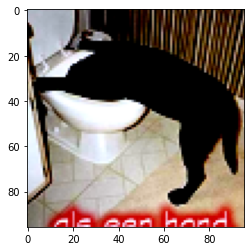

In [140]:
model= nn.Sequential(
    nn.Linear(3 * 96*96, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
)
img, label = data_set[999]
plt.imshow(utils.make_grid(img).permute(1, 2, 0))
class_names[label]

In [141]:
out= model(img.view(-1).unsqueeze(0))
out

tensor([[0.5873, 0.4127]], grad_fn=<SoftmaxBackward>)

In [142]:
_, index = torch.max(out, dim=1)
print('->', class_names[label],'model:', class_names[index])

-> dog model: dog


# MNIST

---

---





In [233]:
transform  = transforms.Compose([transforms.Resize((28,28)),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485], std=[0.229])
                                ])
dir = '/path/'
full_data_set = datasets.MNIST(dir, train=True, download=True, target_transform=None, transform = transform)

full_validation_set = datasets.MNIST(dir, train=False, download=True, target_transform=None, transform= transform)

print ("length of training_dataset: ", len(full_data_set))
print ("length of validation_dataset: ", len(full_validation_set))

Extracting /path/MNIST/raw/train-images-idx3-ubyte.gz to /path/MNIST/raw



Extracting /path/MNIST/raw/train-labels-idx1-ubyte.gz to /path/MNIST/raw


Extracting /path/MNIST/raw/t10k-images-idx3-ubyte.gz to /path/MNIST/raw


Extracting /path/MNIST/raw/t10k-labels-idx1-ubyte.gz to /path/MNIST/raw
Processing...
Done!
length of training_dataset:  60000
length of validation_dataset:  10000


In [234]:
size = 32
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=1)

In [235]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()
out = torchvision.utils.make_grid(imgs)

In [236]:
imgs.shape

torch.Size([32, 1, 28, 28])

In [237]:
out.shape

torch.Size([3, 122, 242])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2 - two
2 - two
8 - eight
8 - eight
2 - two
1 - one
4 - four
9 - nine
3 - three
6 - six
4 - four
2 - two
5 - five
9 - nine
8 - eight
0 - zero
7 - seven
7 - seven
3 - three
7 - seven
3 - three
4 - four
1 - one
1 - one
4 - four
4 - four
3 - three
0 - zero
5 - five
1 - one
6 - six
2 - two


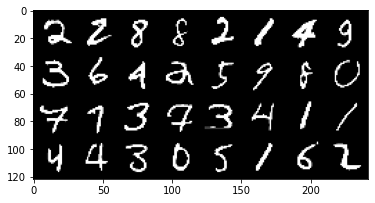

In [238]:
classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four',
               '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))
for i in range(size):
  print(classes[labels[i]])

In [239]:
print(len(data_set))
len(validation_set)

9600


1600

In [241]:
class_names = ['2 - two', '3 - three']
label_map = {2:0, 3:1}
data_set = [(img, label_map[label]) for img, label in full_data_set if label in [2,3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [2,3]]

In [242]:
img, label = data_set[100]
img.shape

torch.Size([1, 28, 28])

In [243]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])

print(softmax(x))
print(softmax(x).sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [244]:
model = nn.Sequential(
    nn.Linear(28* 28, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
    )

'2 - two'

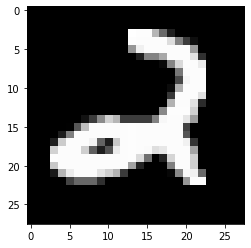

In [255]:
img, label = data_set[800]
plt.imshow(img[0].reshape(28,28), cmap="gray")
class_names[label]

In [256]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.5009, 0.4991]], grad_fn=<SoftmaxBackward>)

In [257]:
_, index = torch.max(out, dim=1)
print('->', class_names[label],'model:',class_names[index])

-> 2 - two model: 2 - two


# EMNIST

---

---





In [211]:
data_path = 'data/'

transform_set = transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize([0.5], [0.5])
                      ])

full_data_set = datasets.EMNIST(root=data_path, transform=transform_set, train =True ,split='letters', download=True)


full_validation_set = datasets.EMNIST(root=data_path, transform=transform_set, train =False, split='letters', download=True)

In [212]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


k
e
d
w


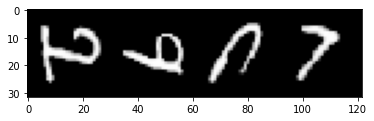

In [218]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['a', 'b', 'c' , 'd' , 'e' ,'f' ,'g' ,'h' , 'i' , 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [219]:
class_names = ['c', 'i']

label_map = {2: 0, 9: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [2, 9]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [2, 9]]

print(len(data_set))
len(validation_set)

9600


1600

In [220]:
img, label = data_set[200]
img.shape

torch.Size([1, 28, 28])

In [221]:
model = nn.Sequential(
              nn.Linear(1 * 28 * 28, 272),
              nn.Tanh(),
              nn.Linear(272, 2),
              nn.Softmax(dim=1)
            )

'i'

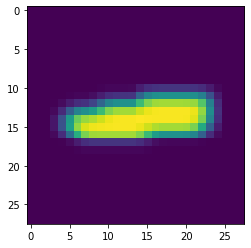

In [229]:
img, label = data_set[600]
plt.imshow(img.squeeze())
class_names[label]

In [230]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.3760, 0.6240]], grad_fn=<SoftmaxBackward>)

In [231]:
_, index = torch.max(out, dim=1)

print('->', class_names[label], ' model:', class_names[index])

-> i  model: i


# CIFAR 100

---

---





In [258]:
data_path = 'data/'
full_data_set = datasets.CIFAR100(data_path, train=True, download=True, transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ]))

full_validation_set = datasets.CIFAR100(data_path, train=True, download=True, transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ]))

Extracting data/cifar-100-python.tar.gz to data/
Files already downloaded and verified


In [259]:
size = 3
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


oak_tree
poppy
trout


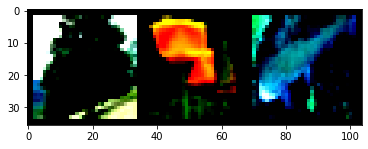

In [260]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 
plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [261]:
class_names = ['bridge', 'bus']
label_map = {12:0, 13:1}
data_set = [(img, label_map[label]) for img, label in full_data_set if label in [12, 13]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [12, 13]]


In [262]:
img, label = data_set[200]
img.shape

torch.Size([3, 32, 32])

In [263]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])

print(softmax(x))
print(softmax(x).sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [264]:
model = nn.Sequential(
    nn.Linear(3 * 32* 32,512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
    )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'bus'

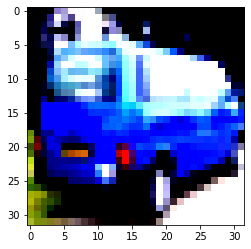

In [281]:
img, label = data_set[700]
plt.imshow(img.permute(1,2,0))
#Me imprime un bus, que es el que esta en la posición 500
class_names[label]

In [282]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.3387, 0.6613]], grad_fn=<SoftmaxBackward>)

In [283]:
_, index = torch.max(out, dim=1)
#Me imprime que el bus es un bus
print('->', class_names[label],'model:',class_names[index])

-> bus model: bus


# FashionMNIST
---

---





In [143]:
data_path = 'data/'
full_data_set = datasets.FashionMNIST(data_path, train = True, download = True, transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.2860), (0.3530))]))

full_validation_set = datasets.FashionMNIST(data_path, train = False, download = True, transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.2860), (0.3530))]))


In [144]:
size = 3
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Coat
Trouser
Shirt


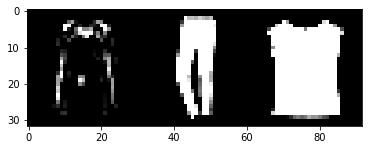

In [145]:
data_iterator = iter(dataloader) 
imgs, labels = data_iterator.next()

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(utils.make_grid(imgs).permute(1, 2, 0)) # muestra la imagen en formato grid
for i in range(size):
  print(classes[labels[i]]) #imprime el nombre de las etiquetas en el batch actual

In [148]:
class_names = ["Trouser","Dress"]
label_map = {1:0, 3:1}
data_set = [(img, label_map[label])for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1,3]]
img, label = data_set[200]
img.shape
print(len(data_set))
len(validation_set)

12000


2000

In [149]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])

print(softmax(x))
print(softmax(x).sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'Trouser'

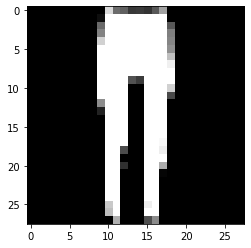

In [150]:
model = nn.Sequential(
    nn.Linear(1 * 28 * 28, 392),
    nn.Tanh(), #la función de activación de esas salidas es tahn
    nn.Linear(392, 2),
    nn.LogSoftmax(dim=1)
    )
img, label = data_set[1500]
plt.imshow(utils.make_grid(img).permute(1, 2, 0))
class_names[label]

In [151]:
out = model(img.view(-1).unsqueeze(0))
out
_, index = torch.max(out, dim=1)
print('->', class_names[label],'model:',class_names[index])

-> Trouser model: Trouser
